# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

### Extraemos los datos del csv.

In [106]:
df = pd.read_csv("..\\data\\C2A2_data\\BinnedCsvs_d400\\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


### Calculamos las temperaturas récord máximas y mínimas de los años 2005-2014. Luego graficamos los datos obtenidos.

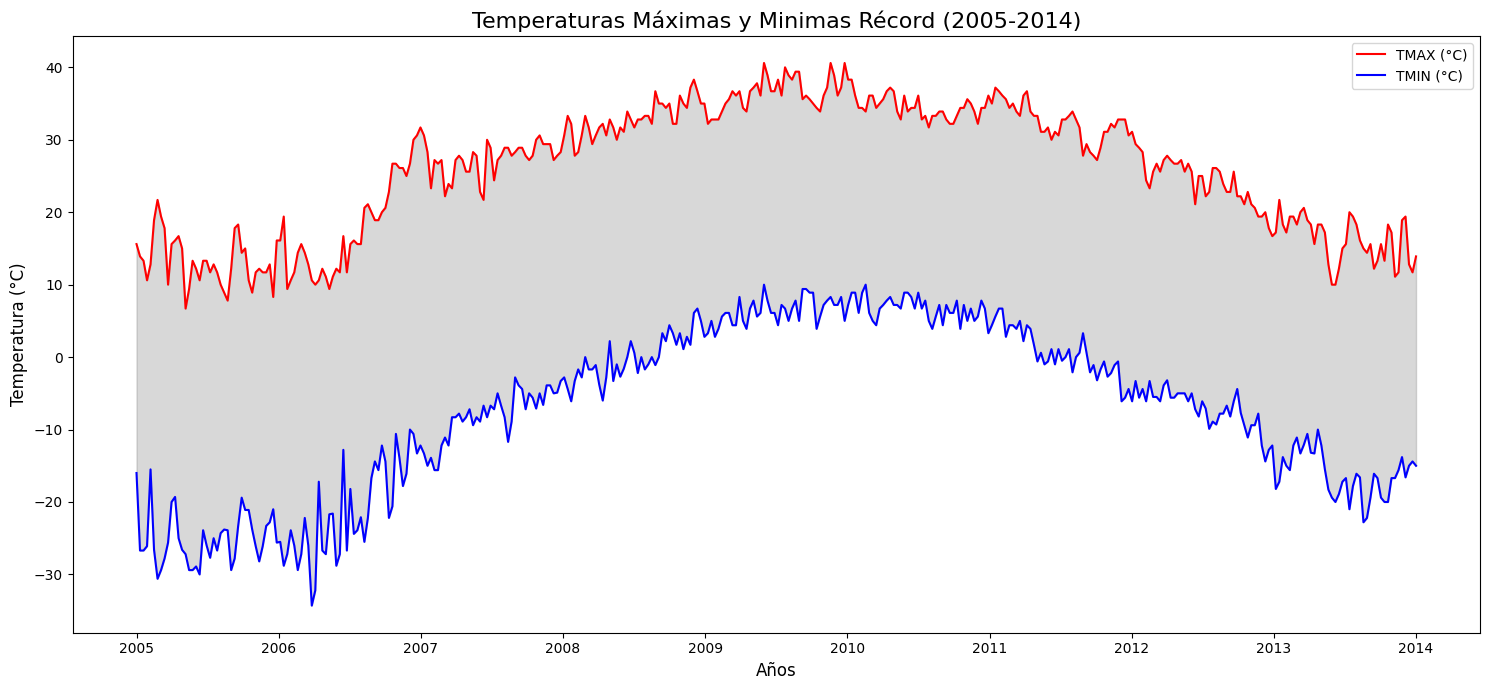

In [107]:
import numpy as np

df["Date"] = pd.to_datetime(df["Date"])

# Filtrar fechas a estudiar
df2 = df[(df["Date"] >= "2005-01-01") & (df["Date"] <= "2014-12-31")]
df2 = df.copy()
df2.loc[:, "DayOfYear"] = df2["Date"].dt.strftime("%m-%d")

tmax = df2[df2["Element"] == "TMAX"]
tmin = df2[df2["Element"] == "TMIN"]

# Calcular las temperaturas récord máximas y mínimas por dia
tmax_record = tmax.groupby('DayOfYear')['Data_Value'].max()
tmin_record = tmin.groupby('DayOfYear')['Data_Value'].min()

# Graficar los datos
plt.figure(figsize=(15, 7))
plt.plot(tmax_record.index, tmax_record.values / 10, label='TMAX (°C)', color="red")
plt.plot(tmin_record.index, tmin_record.values / 10, label='TMIN (°C)', color="blue")
plt.fill_between(tmax_record.index, tmin_record.values / 10, tmax_record.values / 10, color='gray', alpha=0.3)

# Título y leyendas
plt.title('Temperaturas Máximas y Minimas Récord (2005-2014)', fontsize=16)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
num_days = len(tmax_record)
years = range(2005, 2015)
tick_positions = np.linspace(0, num_days - 1, len(years))

plt.xticks(ticks=tick_positions, labels=years)
plt.legend()
plt.tight_layout()

plt.show()

### Superponemos en la gráfica realizada anteriormente los datos del año 2015 para cualquier punto, máximos y mínimos, para los cuales se superó el récord de diez años (2005-2014).

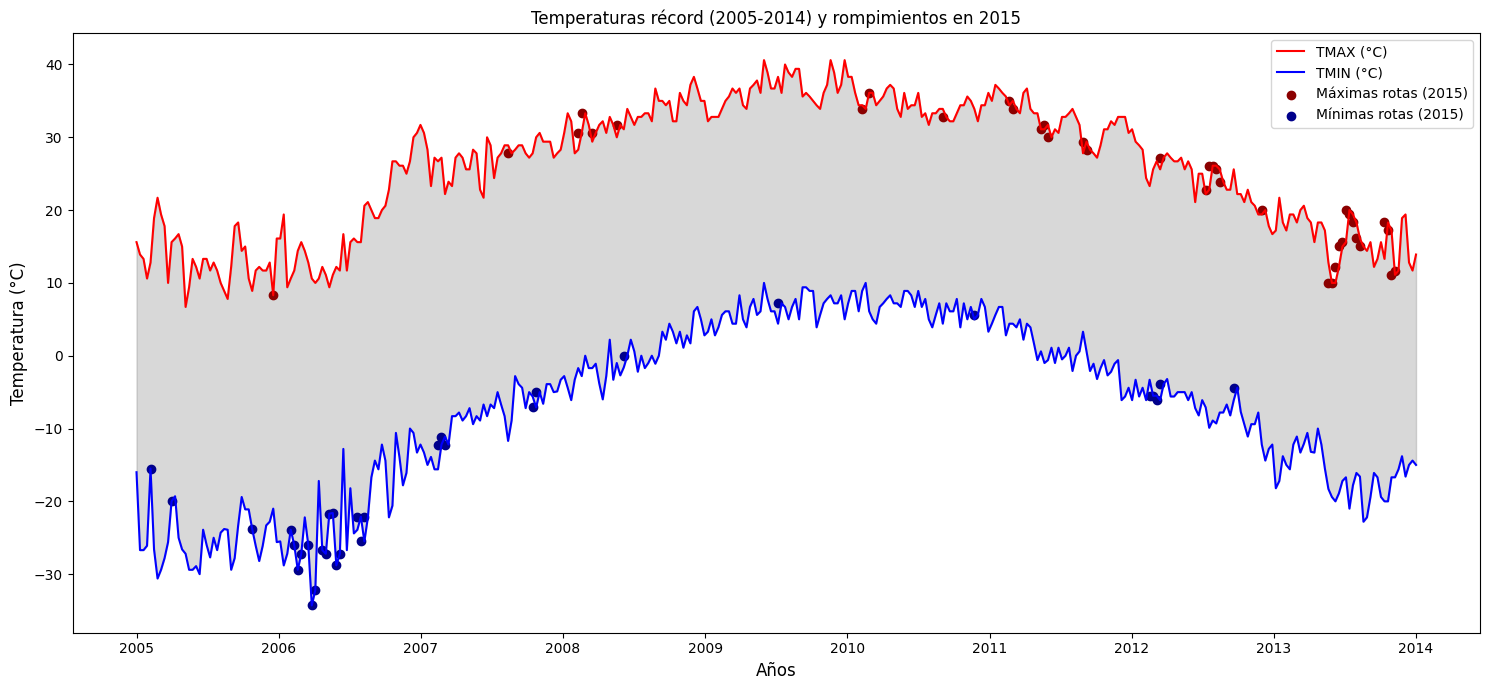

In [108]:
# Alinear los índices
broken_max = broken_max.reindex(record_max.index, fill_value=np.nan)
broken_min = broken_min.reindex(record_min.index, fill_value=np.nan)

plt.figure(figsize=(15, 7))
plt.plot(tmax_record.index, tmax_record.values / 10, label='TMAX (°C)', color="red")
plt.plot(tmin_record.index, tmin_record.values / 10, label='TMIN (°C)', color="blue")
plt.fill_between(tmax_record.index, tmin_record.values / 10, tmax_record.values / 10, color='gray', alpha=0.3)

# Superponer puntos donde 2015 rompió récords
plt.scatter(range(len(record_max)), broken_max.values / 10, color='darkred', label='Máximas rotas (2015)')
plt.scatter(range(len(record_min)), broken_min.values / 10, color='darkblue', label='Mínimas rotas (2015)')

# Título y leyendas
plt.title('Temperaturas récord (2005-2014) y rompimientos en 2015')
plt.xlabel('Años', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

num_days = len(tmax_record)
years = range(2005, 2015)
tick_positions = np.linspace(0, num_days - 1, len(years))

plt.xticks(ticks=tick_positions, labels=years)
plt.legend()
plt.tight_layout()

plt.show()